<a href="https://colab.research.google.com/github/rafasuzuki/DataScience/blob/main/AirbnbNY.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Análise dos Dados do Airbnb - Nova York
O [Airbnb](https://www.airbnb.com.br/) é um um serviço online onde as pessoas anunciam e reservam acomodações. Nascida em 2008 em San Francisco, hoje é considerada a  **maior empresa hoteleira da atualidade**, sendo que a empresa não possui um único quarto de hotel.

A empresa faz a conexão entre o hospede e o anfitrião que deseja alugar seu imóvel de uma maneira simples e rápida. 

No final de 2018, a Startup já havia **hospedado mais de 300 milhões** de pessoas em todo o mundo, tornando-se uma grande concorrência as redes hoteleiras tradicionais.

A empresa disponibiliza dados em seu site para algumas das principais cidades do mundo. Através do portal [Inside Airbnb](http://insideairbnb.com/get-the-data.html), é possível baixar uma grande quantidade de dados para desenvolver projetos e soluções de *Data Science*.

<center><img alt="Analisando Airbnb" width="10%" src="https://www.area360.com.au/wp-content/uploads/2017/09/airbnb-logo.jpg"></center>

**Neste *notebook*, iremos analisar os dados referentes à cidade do Nova York, e ver quais insights podem ser extraídos a partir de dados brutos.**


## Obtenção dos Dados

Neste notebook foram usados os dados obtidos a partir do site [Inside Airbnb](http://insideairbnb.com/get-the-data.html).

Para esta análise exploratória inicial, será baixado apenas o seguinte arquivo:

* `listings.csv` - *Summary information and metrics for listings in New York (good for visualisations).*

In [ ]:
# importando os pacotes necessários
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

%matplotlib inline


In [ ]:
# importando o arquivo listings.csv para um DataFrame
df = pd.read_csv('http://data.insideairbnb.com/united-states/ny/new-york-city/2021-04-07/visualisations/listings.csv')


## Análise dos Dados

Para uma maior facilidade e entendimento dos dados coletados apresentaremos aqui uma legenda para as variáveis no *dataset*.


* `id` - número de id gerado para identificar o imóvel
* `name` - nome da propriedade anunciada
* `host_id` - número de id do proprietário (anfitrião) da propriedade
* `host_name` - Nome do anfitrião
* `neighbourhood_group` - esta coluna não contém nenhum valor válido
* `neighbourhood` - nome do bairro
* `latitude` - coordenada da latitude da propriedade
* `longitude` - coordenada da longitude da propriedade
* `room_type` - informa o tipo de quarto que é oferecido
* `price` - preço para alugar o imóvel
* `minimum_nights` - quantidade mínima de noites para reservar
* `number_of_reviews` - número de reviews que a propriedade possui
* `last_review` - data do último review
* `reviews_per_month` - quantidade de reviews por mês
* `calculated_host_listings_count` - quantidade de imóveis do mesmo anfitrião
* `availability_365` - número de dias de disponibilidade dentro de 365 dias

Para podermos iniciar a análise, vamos verificar a estrutura do *dataset*, analisando as primeiras 5 entradas.


In [ ]:
# mostrando as 5 primeras entradas
df.head()

,id,name,host_id,host_name,neighbourhood_group,neighbourhood,latitude,longitude,room_type,price,minimum_nights,number_of_reviews,last_review,reviews_per_month,calculated_host_listings_count,availability_365
0,2595,Skylit Midtown Castle,2845,Jennifer,Manhattan,Midtown,40.75356,-73.98559,Entire home/apt,150,30,48,2019-11-04,0.35,3,365
1,3831,"Whole flr w/private bdrm, bath & kitchen(pls r...",4869,LisaRoxanne,Brooklyn,Bedford-Stuyvesant,40.68494,-73.95765,Entire home/apt,76,1,396,2021-03-19,4.98,1,198
2,5121,BlissArtsSpace!,7356,Garon,Brooklyn,Bedford-Stuyvesant,40.68535,-73.95512,Private room,60,30,50,2019-12-02,0.35,1,365
3,5136,"Spacious Brooklyn Duplex, Patio + Garden",7378,Rebecca,Brooklyn,Sunset Park,40.66265,-73.99454,Entire home/apt,175,7,1,2014-01-02,0.01,1,79
4,5178,Large Furnished Room Near B'way,8967,Shunichi,Manhattan,Midtown,40.76457,-73.98317,Private room,79,2,474,2020-09-25,3.26,1,355


### **Q1. Quantos atributos (variáveis) e quantas entradas o nosso conjunto de dados possui? Quais os tipos das variáveis?**

Para prosseguirmos, a partir daqui, iremos verificar a quantidade de entradas que nosso *dataset* possui e ver os tipos de cada coluna.

Lembrando que este conjunto de dados `listings.csv` é uma versão "resumida" do Airbnb. Existe uma versão mais completa deste *dataset* no mesmo site onde foram extraídos os dados para essa análise(`listings.csv.gz`).




In [ ]:
# identificar o volume de dados do DataFrame
print("Entradas:\t {}".format(df.shape[0]))
print("Variáveis:\t {}\n".format(df.shape[1]))

# verificar as 5 primeiras entradas do dataset
display(df.dtypes)

Entradas:	 36905
Variáveis:	 16



id                                  int64
name                               object
host_id                             int64
host_name                          object
neighbourhood_group                object
neighbourhood                      object
latitude                          float64
longitude                         float64
room_type                          object
price                               int64
minimum_nights                      int64
number_of_reviews                   int64
last_review                        object
reviews_per_month                 float64
calculated_host_listings_count      int64
availability_365                    int64
dtype: object

### **Q2. Qual a porcentagem de valores ausentes no *dataset*?**

A qualidade de um *dataset* está diretamente relacionada à quantidade de valores ausentes. É importante entender logo no início se esses valores nulos são significativos comparados ao total de entradas.

As variáveis `reviews_per_month` e `last_review` têm em torno de 20% dos valores nulos. Porém nesta análise não utilizaremos essas variáveis.

In [ ]:
# ordenar em ordem decrescente as variáveis por seus valores ausentes
(df.isnull().sum() / df.shape[0]).sort_values(ascending=False)

reviews_per_month                 0.263379
last_review                       0.263379
host_name                         0.034358
name                              0.000352
availability_365                  0.000000
calculated_host_listings_count    0.000000
number_of_reviews                 0.000000
minimum_nights                    0.000000
price                             0.000000
room_type                         0.000000
longitude                         0.000000
latitude                          0.000000
neighbourhood                     0.000000
neighbourhood_group               0.000000
host_id                           0.000000
id                                0.000000
dtype: float64

### **Q3. Qual o tipo de distribuição das variáveis?** 

Para visualizar a distribuição das variáveis, iremos plotar um histograma.






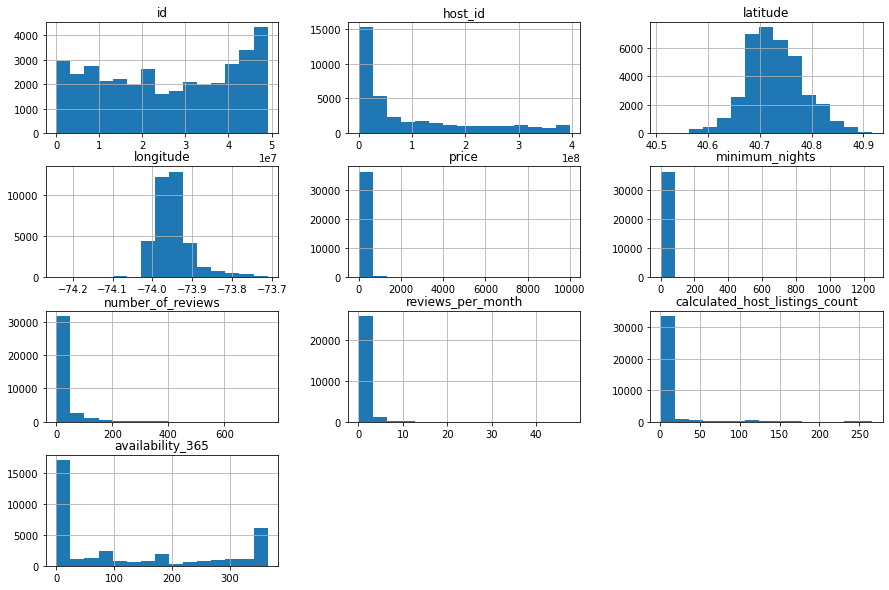

In [ ]:
# plotar o histograma das variáveis numéricas
df.hist(bins=15, figsize=(15,10));

### **Q4. Há *outliers* presentes?**

Olhando para a distribuição do histograma referente as variáveis `price` e `minimum_nights`, podemos cogitar a presença de *outliers*.


Os valores distorcem a representação gráfica. Sendo assim, há duas maneiras que podem nos auxiliar com a detecção dos *outliers*. São elas:

* Resumo estatístico por meio do método `describe()`
* Plotar `boxplots` para a variável.

In [ ]:
# ver o resumo estatístico das variáveis numéricas
df[['price', 'minimum_nights', 'number_of_reviews', 'reviews_per_month',
    'calculated_host_listings_count', 'availability_365']].describe()

,price,minimum_nights,number_of_reviews,reviews_per_month,calculated_host_listings_count,availability_365
count,36905.000000,36905.000000,36905.000000,27185.000000,36905.000000,36905.000000
mean,148.559274,23.123235,22.668636,0.854783,11.071318,123.697087
std,290.379973,26.546473,48.003378,1.349439,36.699390,143.178789
min,0.000000,1.000000,0.000000,0.010000,1.000000,0.000000
25%,61.000000,4.000000,0.000000,0.100000,1.000000,0.000000
50%,100.000000,30.000000,4.000000,0.340000,1.000000,54.000000
75%,160.000000,30.000000,20.000000,1.090000,3.000000,269.000000
max,10000.000000,1250.000000,755.000000,47.600000,266.000000,365.000000


Boxplot para minimum_nights

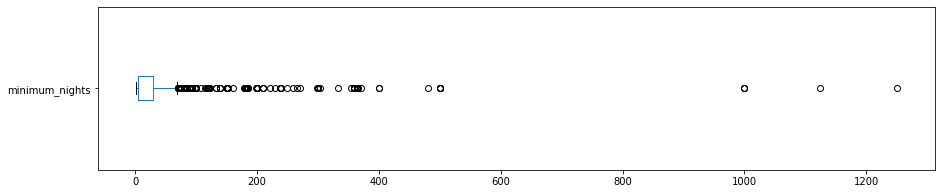

minimum_nights: valores acima de 30:
1329 entradas
3.6011%


In [ ]:
# minimum_nights
df.minimum_nights.plot(kind='box', vert=False, figsize=(15, 3))
plt.show()

# ver quantidade de valores acima de 30 dias para minimum_nights
print("minimum_nights: valores acima de 30:")
print("{} entradas".format(len(df[df.minimum_nights > 30])))
print("{:.4f}%".format((len(df[df.minimum_nights > 30]) / df.shape[0])*100))

Boxplot para price

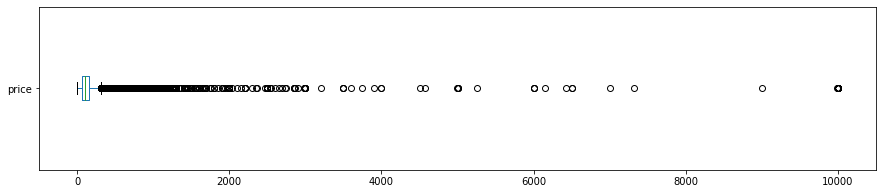


price: valores acima de 1000
267 entradas
0.7235%


In [ ]:
# price
df.price.plot(kind='box', vert=False, figsize=(15, 3),)
plt.show()

# ver quantidade de valores acima de 1000 para price
print("\nprice: valores acima de 1000")
print("{} entradas".format(len(df[df.price > 1000])))
print("{:.4f}%".format((len(df[df.price > 1000]) / df.shape[0])*100))

# df.price.plot(kind='box', vert=False, xlim=(0,1300), figsize=(15,3));

#### Histogramas sem *outliers*

Agora que identificamos *outliers* das variáveis `price` e `minimum_nights`, podemos limpar o *DataFrame* e plotar novamente o histograma sem as distorções anteriores.

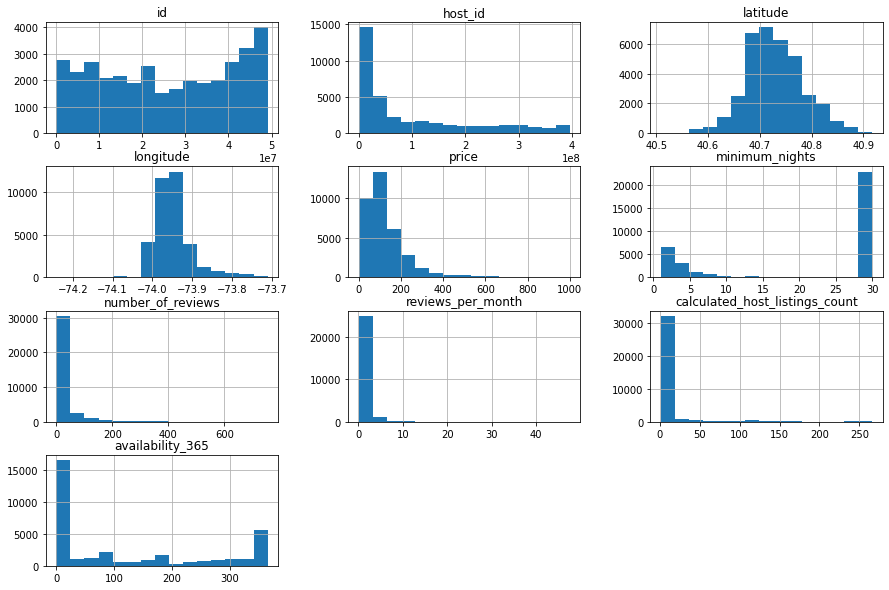

In [ ]:
df_clean = df.copy()
df_clean.drop(df_clean[df_clean.price > 1000].index, axis=0, inplace=True)
df_clean.drop(df_clean[df_clean.minimum_nights > 30].index, axis=0, inplace=True)

# remover `neighbourhood_group`, pois está vazio
df_clean.drop('neighbourhood_group', axis=1, inplace=True)

# plotar o histograma para as variáveis numéricas
df_clean.hist(bins=15, figsize=(15,10));

### **Q4. Qual a média dos preços de aluguel?**
Agora que temos um *dataset* limpo, podemos verificar a média dos preços de aluguéis em nosso conjunto de dados.

In [ ]:
# ver a média da coluna `price``
price_mean = int(df_clean.price.mean())
print('$', price_mean, '.00')


$ 132 .00


### **Q4. Qual a correlação existente entre as variáveis**

Correlação significa que existe uma relação entre duas coisas. No nosso contexto, estamos buscando relação ou semelhança entre duas variáveis.

Essa relação pode ser medida, e é função do coeficiente de correlação estabelecer qual a intensidade dela. Para identificar as correlações existentes entre as variáveis de interesse, vou:

* Criar uma matriz de correlação
* Gerar um *heatmap* a partir dessa matriz, usando a biblioteca `seaborn`

In [ ]:
# criar uma matriz de correlação
corr = df_clean[['price', 'minimum_nights', 'number_of_reviews', 'reviews_per_month',
    'calculated_host_listings_count', 'availability_365']].corr()

display(corr)

,price,minimum_nights,number_of_reviews,reviews_per_month,calculated_host_listings_count,availability_365
price,1.000000,-0.025512,-0.047427,-0.044193,-0.007068,0.058958
minimum_nights,-0.025512,1.000000,-0.256095,-0.397251,0.130146,-0.142901
number_of_reviews,-0.047427,-0.256095,1.000000,0.667066,-0.106032,0.145189
reviews_per_month,-0.044193,-0.397251,0.667066,1.000000,-0.010162,0.196335
calculated_host_listings_count,-0.007068,0.130146,-0.106032,-0.010162,1.000000,0.212175
availability_365,0.058958,-0.142901,0.145189,0.196335,0.212175,1.000000


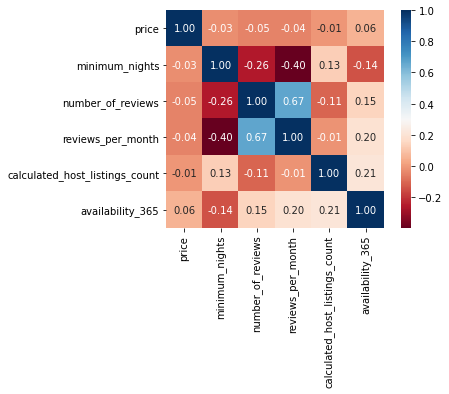

In [ ]:
sns.heatmap(corr, cmap='RdBu', fmt='.2f', square=True, linecolor='white', annot=True);

### **Q5. Qual o tipo de imóvel mais alugado no Airbnb?**
Ao utilizar a plataforma do Airbnb, você pode escolher o tipo de locação em qual deseja se instalar. Apartamento/casas inteira, apenas um quarto ou mesmo dividir um quarto com outras pessoas, todas essas informações podemos achar na variável `room_type`.



Utilizaremos o método `value_counts()` para contar as ocorrências de cada tipo de aluguel em nossa coluna  `room_type`. 




In [ ]:
# mostrar a quantidade de cada tipo de imóvel disponível
df_clean.room_type.value_counts()

Entire home/apt    18270
Private room       16168
Shared room          634
Hotel room           269
Name: room_type, dtype: int64

In [ ]:
# mostrar a porcentagem de cada tipo de imóvel disponível
df_clean.room_type.value_counts() / df_clean.shape[0]

Entire home/apt    0.516963
Private room       0.457486
Shared room        0.017940
Hotel room         0.007612
Name: room_type, dtype: float64

### **Q6. Qual a localidade mais cara do Nova York?**

Para acharmos qual é a localidade mais cara da cidade de Nova York iremos utilizar a função `groupby()`. Essa função nos permite verificar uma variável em função de outra. No caso as variáveis `price` e `neighbourhood`.






In [ ]:
df_clean.groupby(['neighbourhood']).price.mean().sort_values(ascending=False)[:15]

neighbourhood
Fort Wadsworth       800.000000
Tottenville          329.000000
Willowbrook          309.000000
Tribeca              307.184211
Prince's Bay         290.000000
SoHo                 246.826772
DUMBO                232.769231
Jamaica Estates      229.777778
Holliswood           227.600000
NoHo                 222.311111
Flatiron District    221.655738
Midtown              220.335063
Theater District     215.738351
Lighthouse Hill      210.000000
Greenwich Village    208.645022
Name: price, dtype: float64




Acima, vemos que bairros como Fort Wadsworth, Tottenville e Willowbrook estão com a média de preço superior a de lugares como Tribeca, que fica localizada na ilha de Manhattan.

Sabendo que na ilha de Manhattan se concentra os principais pontos turísticos, com uma rápida olhada no *Google Maps* podemos ver que os 3 primeiros lugares de nossa lista estão afastados dessa região.

Com isso, analisamos quantas entradas possuiam cada um desses 3 primeiros bairros, e percebemos que ambos possuem apenas uma locação. O que joga a média do aluguel da região pro alto.

Para se ter uma ideia, o bairro de Tribeca que fica localizada em Manhattan, e se apresenta em quarto lugar em nossa lista de aluguéis mais caros, possui 152 entradas. 


In [ ]:
# ver quantidade de imóveis no Fort Wadsworth
print(df_clean[df_clean.neighbourhood == "Fort Wadsworth"].shape)

# ver as 3 entradas Fort Wadsworth
df_clean[df_clean.neighbourhood == "Fort Wadsworth"]

(1, 15)


,id,name,host_id,host_name,neighbourhood,latitude,longitude,room_type,price,minimum_nights,number_of_reviews,last_review,reviews_per_month,calculated_host_listings_count,availability_365
14882,20305160,Beach House Retreat. 15 minutes from Manhattan.,1715301,Mark,Fort Wadsworth,40.59324,-74.0608,Entire home/apt,800,30,0,NaN,NaN,6,365


In [ ]:
# ver quantidade de imóveis no Tottenville
print(df_clean[df_clean.neighbourhood == "Tottenville"].shape)

# ver as 3 entradas Tottenville
df_clean[df_clean.neighbourhood == "Tottenville"]

(1, 15)


,id,name,host_id,host_name,neighbourhood,latitude,longitude,room_type,price,minimum_nights,number_of_reviews,last_review,reviews_per_month,calculated_host_listings_count,availability_365
908,639199,"Beautiful 4BR/4BA Home, Staten Island, NY City.",1483081,Marina,Tottenville,40.50863,-74.24135,Entire home/apt,329,3,76,2021-03-29,0.82,1,260


In [ ]:
# ver quantidade de imóveis no Willowbrook
print(df_clean[df_clean.neighbourhood == "Willowbrook"].shape)

# ver as 3 entradas Willowbrook
df_clean[df_clean.neighbourhood == "Willowbrook"]

(1, 15)


,id,name,host_id,host_name,neighbourhood,latitude,longitude,room_type,price,minimum_nights,number_of_reviews,last_review,reviews_per_month,calculated_host_listings_count,availability_365
19035,27088022,Bright and Spacious Gorgeous Home,115827173,David,Willowbrook,40.59919,-74.13389,Entire home/apt,309,4,19,2020-06-13,0.58,2,363


In [ ]:
# ver quantidade de imóveis no Tribeca
print(df_clean[df_clean.neighbourhood == "Tribeca"].shape)

# ver as 3 entradas Tribeca
df_clean[df_clean.neighbourhood == "Tribeca"]

(152, 15)


,id,name,host_id,host_name,neighbourhood,latitude,longitude,room_type,price,minimum_nights,number_of_reviews,last_review,reviews_per_month,calculated_host_listings_count,availability_365
104,43726,"Apartment in Tribeca, NYC Panoramic VIEWS~",191091,Ev,Tribeca,40.72100,-74.00971,Entire home/apt,250,30,13,2020-12-29,0.73,1,155
143,60164,"Beautiful, elegant 3 bed SOHO loft",289653,Harrison,Tribeca,40.72012,-74.00397,Entire home/apt,500,30,106,2020-01-02,0.91,1,0
714,471758,TriBeCa Amazing River View Loft 3BR,2339722,Francesca,Tribeca,40.72254,-74.01074,Entire home/apt,500,30,3,2018-06-19,0.04,1,0
740,494937,"The SoHo Loft - Huge Penthouse - 1,200 sqft",1527535,Jean-Marie,Tribeca,40.71993,-74.00502,Entire home/apt,535,1,116,2021-04-11,1.11,1,80
857,591565,Everyone who stays leaves happy!,2919467,Lisa,Tribeca,40.71493,-74.00698,Private room,229,30,62,2014-04-27,0.59,1,365
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
34400,47283146,The TriBeCa LOFT #4 ; Church st. Perfect locat...,86771798,Daia,Tribeca,40.71787,-74.00370,Entire home/apt,249,30,1,2021-02-05,0.47,18,169
34792,47713016,Tribeca Room - Laundry - Gym,268555779,Joanne,Tribeca,40.71881,-74.01187,Private room,70,7,0,NaN,NaN,1,0
35406,48117790,Tribeca Designer Loft,42636558,Carmen,Tribeca,40.71537,-74.00724,Entire home/apt,800,10,0,NaN,NaN,1,76
35626,48242253,Stunning Two Bedroom in Tribeca,22541573,Ken,Tribeca,40.71691,-74.00553,Entire home/apt,379,30,0,NaN,NaN,92,359


Em nosso *dataset* nos é fornecido a Latitude e Longitude de cada imóvel com isso é possível plotar cada ponto. Considera-se `x=longitude` e `y=latitude`.

Como dito antes, podemos ver a ilha de Manhattan e regiões ao redor dela como o Brooklyn e Queens bem destacados. Comprovando mais uma vez que esta região é a mais movimentada da cidade de Nova York.

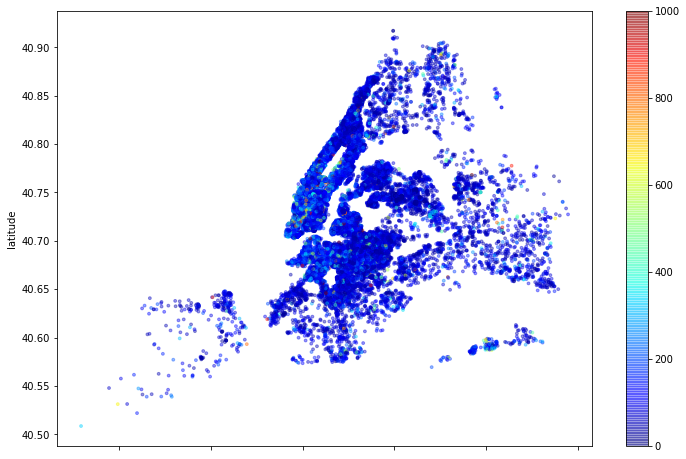

In [ ]:
# plotar os imóveis pela latitude-longitude
df_clean.plot(kind="scatter", x='longitude', y='latitude', alpha=0.4, c=df_clean['price'], s=8,
              cmap=plt.get_cmap('jet'), figsize=(12,8));

### **Q7. Qual é a média do mínimo de noites para aluguel (minimum_nights)?**
Analisando o histograma plotado para a variável `minimum_nights`, podemos ver que os locais a serem alugados em sua maioria, correspondem a 30 dias.
Outra parcela dos aluguéis correspondem a média de 2 ou 3 dias. Provavelmente relativos a turismo. Com isso a média de mínimo de noites para aluguel fica em torno de 20 dias.

In [ ]:
df_clean.minimum_nights.mean()

20.708978240570442

## Conclusões

Com base nessa análise superficial  feita com os dados do Airbnb, podemos ver que temos um mínimo de dados ausentes. Mas mesmo assim, ainda se apresenta como um bom *dataset* para  estudo.

Com poucos imóveis em determinadas regiões, algumas localidades distorcem as informações estatísticas de alguns atributos.

Para uma abordagem inicial este *dataset* é o suficiente, lembrando que se trata de uma versão resumida. Para uma análise exploratória mais profunda, recomenda-se o uso de um *dataset* completo, que se encontra no mesmo site aonde foi retirado esse, possuindo 106 variáveis.
